# Data Preprocessing

In [2]:
# IMPORT LIBRARY

import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

warnings.filterwarnings("ignore")

In [3]:
# CONNECT TO GDRIVE

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
dataframe = pd.read_excel('/content/drive/MyDrive/Portofolio/Customer Segmentation - Halal Mart Semarang /DataJan-Agust.xlsx')

In [5]:
dataframe.head()

,No.,No. Invoice,ID Pembeli,Nama Pembeli,Tgl. Penjualan,Total VP,Item,Total
0,1.0,B004742201011,442501.0,"EKO WAHYUDI, SAP",01-01-2022,20000.0,1.0,55000.0
1,2.0,B004742201021,1413696.0,YUNI MARFUAH,02-01-2022,100000.0,3.0,280000.0
2,3.0,B004742201031,3721584.0,NUR AMINAH,03-01-2022,265000.0,14.0,855000.0
3,4.0,B004742201032,2752527.0,ELENORA YARMANI,03-01-2022,60000.0,3.0,195000.0
4,5.0,B004742201033,3779229.0,EKA DEWI MEIWATI,03-01-2022,126000.0,4.0,425000.0


In [6]:
dataframe.dtypes

No.               float64
No. Invoice        object
ID Pembeli        float64
Nama Pembeli       object
Tgl. Penjualan     object
Total VP          float64
Item              float64
Total             float64
dtype: object

In [7]:
dataframe.describe()

,No.,ID Pembeli,Total VP,Item,Total
count,1173.000000,1.173000e+03,1.173000e+03,1173.000000,1.173000e+03
mean,75.501279,2.381924e+06,1.380895e+05,8.785166,4.594974e+05
std,45.266364,1.434164e+06,2.033941e+05,13.421554,6.746990e+05
min,1.000000,4.759800e+04,0.000000e+00,0.000000,0.000000e+00
25%,37.000000,1.098449e+06,2.500000e+04,2.000000,9.000000e+04
50%,74.000000,2.650799e+06,6.000000e+04,3.000000,1.950000e+05
75%,110.000000,3.779229e+06,1.450000e+05,9.000000,4.850000e+05
max,188.000000,4.632099e+06,1.496500e+06,96.000000,5.193000e+06


## Check missing values

In [8]:
# Check missing values

dataframe.isnull().sum()

No.               0
No. Invoice       0
ID Pembeli        0
Nama Pembeli      0
Tgl. Penjualan    0
Total VP          0
Item              0
Total             0
dtype: int64

## Drop duplicate data

In [68]:
# Drop duplicate data

dataframe.drop_duplicates()

,No.,No. Invoice,ID Pembeli,Nama Pembeli,Tgl. Penjualan,Total VP,Item,Total
0,1.0,B004742201011,442501.0,"EKO WAHYUDI, SAP",01-01-2022,20000.0,1.0,55000.0
1,2.0,B004742201021,1413696.0,YUNI MARFUAH,02-01-2022,100000.0,3.0,280000.0
2,3.0,B004742201031,3721584.0,NUR AMINAH,03-01-2022,265000.0,14.0,855000.0
3,4.0,B004742201032,2752527.0,ELENORA YARMANI,03-01-2022,60000.0,3.0,195000.0
4,5.0,B004742201033,3779229.0,EKA DEWI MEIWATI,03-01-2022,126000.0,4.0,425000.0
...,...,...,...,...,...,...,...,...
1168,128.0,A7654532208313,584788.0,ANISAH,31-08-2022,468000.0,36.0,1580000.0
1169,129.0,A7654532208314,3779229.0,EKA DEWI MEIWATI,31-08-2022,25000.0,1.0,90000.0
1170,130.0,A7654532208315,1522211.0,TRIYANTI,31-08-2022,20000.0,1.0,60000.0
1171,131.0,A7654532208316,584788.0,ANISAH,31-08-2022,128000.0,7.0,430000.0


## Check Correlation

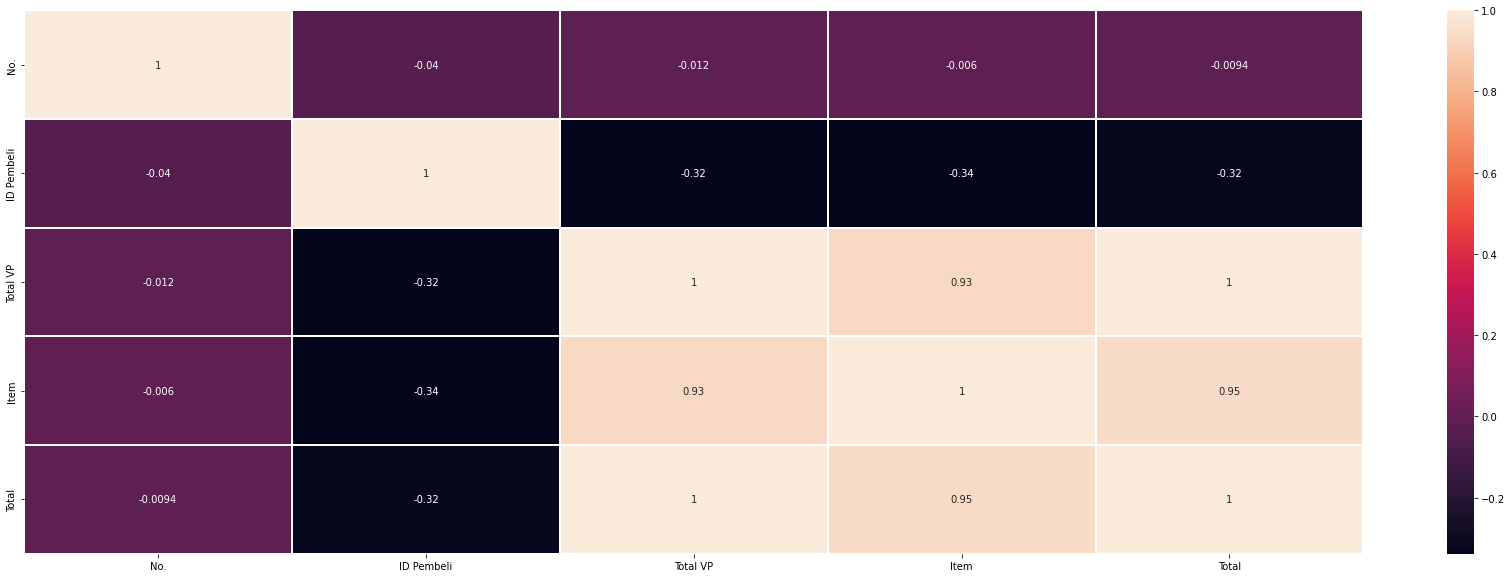

In [9]:
plt.figure(figsize=(30, 10))

corr = dataframe.corr()

sns.heatmap(data= corr, annot=True, fmt = '.2g', linewidth = 1)

plt.show()

## Drop Column Unnecessary 
No, ID Pembeli, Nama Customer

In [10]:
data = dataframe.drop(['No.', 'ID Pembeli', 'No. Invoice', 'Nama Pembeli', 'Tgl. Penjualan'], axis=1)

In [11]:
data.dtypes

Total VP    float64
Item        float64
Total       float64
dtype: object

# Data Standardization

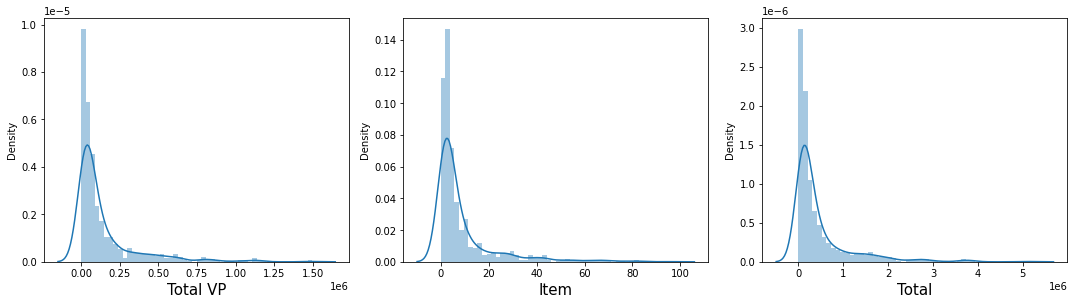

In [12]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in data.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.distplot(data[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

In [13]:
scaler = StandardScaler()

scaler.fit(data)

#Scale and transfer the data
data_scaled = scaler.transform(data)

In [14]:
datascaled = pd.DataFrame(data_scaled, columns=data.columns)
datascaled.head()

,Total VP,Item,Total
0,-0.580842,-0.580297,-0.599779
1,-0.187349,-0.431219,-0.266154
2,0.624229,0.388707,0.586441
3,-0.384096,-0.431219,-0.392190
4,-0.059464,-0.356681,-0.051152


# Clustering

## Choose K number of cluster using elbow method

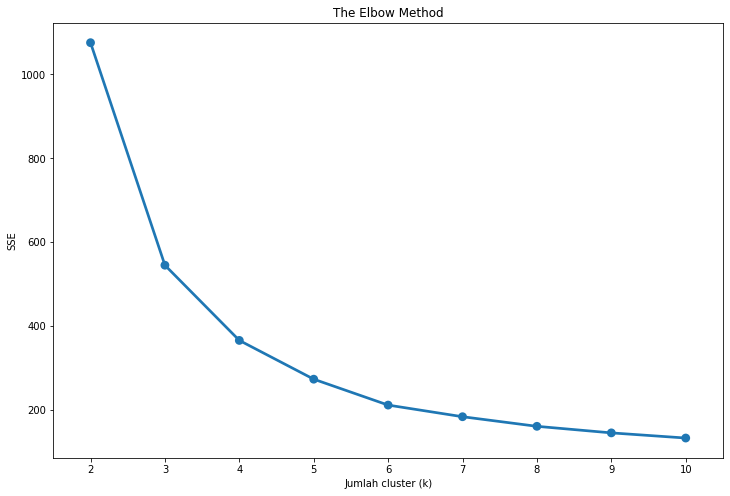

In [16]:
from sklearn.cluster import KMeans
sse = {}
X = datascaled
# Fit KMeans and calculate SSE for each k
for k in range(2, 11):
  
    # Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters=k)
    
    # Fit KMeans on the normalized dataset
    kmeans.fit(datascaled)
    
    # Assign sum of squared distances to k element of dictionary
    sse[k] = kmeans.inertia_
# Plotting the elbow plot
plt.figure(figsize=(12,8))
plt.title('The Elbow Method')
plt.xlabel('Jumlah cluster (k)'); 
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [17]:
sse

{2: 1075.4312041287928,
 3: 544.9899560667761,
 4: 365.7556754927281,
 5: 273.34873398651257,
 6: 211.60906555613673,
 7: 183.86837699422296,
 8: 161.0062100353996,
 9: 145.36234981743385,
 10: 133.07756504949364}

## Centroid Initation

In [18]:
import random
from math import ceil
import random as rd
import copy

In [19]:
df = datascaled
x = 'Total VP'
y = 'Item'
z = 'Total'

In [20]:
def Initiate_Centroid(df,x,y,z,k):
    random.seed(10)
    centroids = {i+1 : [random.choices(df[x]), random.choices(df[y]), random.choices(df[z])] for i in range(k)}
    return centroids

In [21]:
#Test
#Baris = cluster
#Column = variabel
k=3
cen = Initiate_Centroid(df,x,y,z,k)
for i in cen:
    print(cen[i])

[[-0.6128134221091202], [-0.4312193549652563], [-0.5923646286277815]]
[[-0.6300287310655157], [-0.35668055399646087], [-0.611640697392662]]
[[0.9488610332210474], [-0.058525350121279275], [3.9137871387931327]]


## Calculate Distance √((x1-x2)² + (y1-y2)²

In [22]:
def Cal_Dist(df,x,y,z,centroid):
    for i in centroid.keys():
        #menambahkan kolom i(1,2,..,n) yaitu jarak antara objek x dan y dengan masing masing centroid
        df[str(i)] = np.sqrt((df[x] - centroid[i][0]) ** 2 + (df[y] - centroid[i][1]) ** 2 + (df[z] - centroid[i][2]) ** 2 ) 
    return df #jarak antar variabel dg centroid

In [23]:
df2 = Cal_Dist(df,x,y,z,cen)
df2

,Total VP,Item,Total,1,2,3
0,-0.580842,-0.580297,-0.599779,0.152648,0.229269,4.794217
1,-0.187349,-0.431219,-0.266154,0.536128,0.566464,4.347618
2,0.624229,0.388707,0.586441,1.895294,1.887900,3.372927
3,-0.384096,-0.431219,-0.392190,0.303943,0.337931,4.522954
4,-0.059464,-0.356681,-0.051152,0.777601,0.799807,4.101994
...,...,...,...,...,...,...
1168,1.622717,2.028561,1.661453,4.015944,3.991390,3.143728
1169,-0.556249,-0.580297,-0.547881,0.165537,0.243953,4.737519
1170,-0.580842,-0.580297,-0.592365,0.152467,0.229772,4.787237
1171,-0.049627,-0.133064,-0.043738,0.840873,0.842249,4.082222


## Menentukan Keanggotaan

In [24]:
def df_membership(df,centroid):
  df['index cluster'] = (df.loc[:, ['{}'.format(i) for i in centroid.keys()]].idxmin(axis=1)).astype('int') 

  #colmap = ['pink','orange','green','red','purple','brown','blue','gray','olive','cyan','black']
  #df['color'] = df['index cluster'].map(lambda x: colmap[x])
  return df

In [25]:
df2 = df_membership(df2,cen)
df2

,Total VP,Item,Total,1,2,3,index cluster
0,-0.580842,-0.580297,-0.599779,0.152648,0.229269,4.794217,1
1,-0.187349,-0.431219,-0.266154,0.536128,0.566464,4.347618,1
2,0.624229,0.388707,0.586441,1.895294,1.887900,3.372927,2
3,-0.384096,-0.431219,-0.392190,0.303943,0.337931,4.522954,1
4,-0.059464,-0.356681,-0.051152,0.777601,0.799807,4.101994,1
...,...,...,...,...,...,...,...
1168,1.622717,2.028561,1.661453,4.015944,3.991390,3.143728,3
1169,-0.556249,-0.580297,-0.547881,0.165537,0.243953,4.737519,1
1170,-0.580842,-0.580297,-0.592365,0.152467,0.229772,4.787237,1
1171,-0.049627,-0.133064,-0.043738,0.840873,0.842249,4.082222,1


## Menentukan Centroid Baru

In [26]:
def rearrange_centroid(df,centroid):
  for i in centroid.keys():
    centroid[i][0] = np.mean(df[df['index cluster'] == i][x])
    centroid[i][1] = np.mean(df[df['index cluster'] == i][y])
    centroid[i][2] = np.mean(df[df['index cluster'] == i][z])
  return centroid

## Clustering 

In [42]:
def clusterisasi(df,x,y,z,k):
  centroid = Initiate_Centroid(df,x,y,z,k)
  df2 = copy.deepcopy(df)
  df2 = Cal_Dist(df2,x,y,z,centroid)
  df2 = df_membership(df2,centroid)
  centroid = rearrange_centroid(df2,centroid)
  while (True):
    oldcentroid = copy.deepcopy(centroid)
    df2 = Cal_Dist(df2,x,y,z,centroid)
    df2 = df_membership(df2,centroid)
    centroid = rearrange_centroid(df2,centroid)
    if (oldcentroid == centroid):
      break
  return (df2,centroid)

In [43]:
print(clusterisasi(df2,x,y,z,k))

(      Total VP      Item     Total         1         2         3  \
0    -0.580842 -0.580297 -0.599779  0.360331  3.059003  7.331890   
1    -0.187349 -0.431219 -0.266154  0.235111  2.555152  6.829014   
2     0.624229  0.388707  0.586441  1.591092  1.124571  5.395662   
3    -0.384096 -0.431219 -0.392190  0.060184  2.738844  7.012576   
4    -0.059464 -0.356681 -0.051152  0.463317  2.318959  6.590453   
...        ...       ...       ...       ...       ...       ...   
1168  1.622717  2.028561  1.661453  3.736592  1.092497  3.260926   
1169 -0.556249 -0.580297 -0.547881  0.317595  3.014328  7.287794   
1170 -0.580842 -0.580297 -0.592365  0.355915  3.054649  7.327593   
1171 -0.049627 -0.133064 -0.043738  0.531838  2.172367  6.446563   
1172 -0.627569 -0.431219 -0.605710  0.336467  3.010027  7.277249   

      index cluster  
0                 1  
1                 1  
2                 2  
3                 1  
4                 1  
...             ...  
1168              2  
1169  

In [44]:
df2, centroid = clusterisasi(df,x,y,z,k)

In [45]:
cluster = df2[['Total VP', 'Item', 'Total', '1','2','3', 'index cluster']]

In [46]:
cluster = cluster.drop(['Total VP', 'Item', 'Total', '1','2','3'], axis=1)

In [47]:
data_cust = dataframe[['ID Pembeli','Nama Pembeli', 'Total VP', 'Item', 'Total']]

In [48]:
data_cust

,ID Pembeli,Nama Pembeli,Total VP,Item,Total
0,442501.0,"EKO WAHYUDI, SAP",20000.0,1.0,55000.0
1,1413696.0,YUNI MARFUAH,100000.0,3.0,280000.0
2,3721584.0,NUR AMINAH,265000.0,14.0,855000.0
3,2752527.0,ELENORA YARMANI,60000.0,3.0,195000.0
4,3779229.0,EKA DEWI MEIWATI,126000.0,4.0,425000.0
...,...,...,...,...,...
1168,584788.0,ANISAH,468000.0,36.0,1580000.0
1169,3779229.0,EKA DEWI MEIWATI,25000.0,1.0,90000.0
1170,1522211.0,TRIYANTI,20000.0,1.0,60000.0
1171,584788.0,ANISAH,128000.0,7.0,430000.0


In [49]:
data_cust.index = pd.RangeIndex(len(data_cust.index))
result = pd.concat([data_cust, cluster], axis=1)
result.columns = ['ID Pembeli','Nama Pembeli', 'Total VP', 'Item', 'Total', 'index cluster']

In [50]:
result.head()

,ID Pembeli,Nama Pembeli,Total VP,Item,Total,index cluster
0,442501.0,"EKO WAHYUDI, SAP",20000.0,1.0,55000.0,1
1,1413696.0,YUNI MARFUAH,100000.0,3.0,280000.0,1
2,3721584.0,NUR AMINAH,265000.0,14.0,855000.0,2
3,2752527.0,ELENORA YARMANI,60000.0,3.0,195000.0,1
4,3779229.0,EKA DEWI MEIWATI,126000.0,4.0,425000.0,1


In [36]:
result = result.to_excel("/content/drive/MyDrive/Portofolio/CustomerHalalMartSemarang .xlsx")

# Data Visualization and Analysis

In [52]:
# Melakukan grouping data 
group_cluster = result.groupby('index cluster')['ID Pembeli'].count()
group_cluster

index cluster
1    962
2    164
3     47
Name: ID Pembeli, dtype: int64

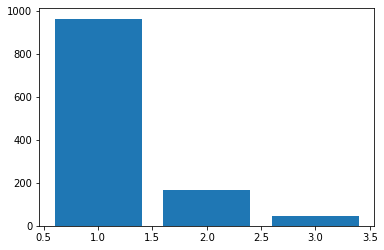

<Figure size 432x288 with 0 Axes>

In [54]:
df_group_cluster = (group_cluster).reset_index()
df_group_cluster.rename(columns = {'ID Pembeli': 'Customers', 'index cluster' : 'Cluster'}, inplace = True)

bars = plt.bar(y,x)

plt.figure(figsize=(6,4))

plt.show()

In [60]:

mean = result.groupby(['index cluster']).agg({'Total VP': 'mean',
                                                    'Item': 'mean',
                                                    'Total': 'mean'}).apply(np.ceil)
mean

,Total VP,Item,Total
,mean,mean,mean
index cluster,,,
1,60296.0,4.0,201333.0
2,383430.0,24.0,1268068.0
3,874298.0,58.0,2922256.0


In [62]:
min = result.groupby(['index cluster']).agg({'Total VP': 'min',
                                                    'Item': 'min',
                                                    'Total': 'min'}).apply(np.ceil)
min

,Total VP,Item,Total
,min,min,min
index cluster,,,
1,0.0,0.0,0.0
2,167000.0,4.0,594000.0
3,454500.0,30.0,1754000.0


In [64]:
max = result.groupby(['index cluster']).agg({'Total VP': 'max',
                                                    'Item': 'max',
                                                    'Total': 'max'}).apply(np.ceil)
max

,Total VP,Item,Total
index cluster,,,
1,245000.0,30.0,780000.0
2,650000.0,57.0,2108000.0
3,1496500.0,96.0,5193000.0
